<a href="https://colab.research.google.com/github/hodades/Faud-Detection-Bank-Acount-/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Account Fraud Detection Using Tree-Based Models and Resampling Techniques**

## Introduction
Fraud detection in banking systems is a critical task as fraudulent activities can lead to significant financial losses. The objective of this project is to develop a machine learning model capable of detecting fraudulent transactions using a tree-based model approach, while addressing the class imbalance in the dataset.

### **Key Goals:**
1. Explore the dataset to understand the key features and their relationships.
2. Apply preprocessing techniques to clean and prepare the data.
3. Handle class imbalance using resampling techniques (SMOTENC).
4. Train tree-based models (Random Forest and Extra Trees) to classify transactions as fraudulent or legitimate.
5. Evaluate the model using recall, ROC, and precision-recall curves to ensure the model is effective for imbalanced data.

---

## 1. Data Loading and Exploration

The first step is to load the data and explore its structure. We want to understand the distribution of features, identify any missing values, and observe how many fraudulent transactions exist.



In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from local storage
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (3).json


In [ ]:
# Read the CSV file into a pandas DataFrame
base = pd.read_csv('Base.csv')


In [ ]:
# Display the first few rows of the dataset
base.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [ ]:
# Overview of the dataset (number of columns, data types, missing values)
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [ ]:
# Statistical summary of the dataset
print(base.describe())

           fraud_bool          income  name_email_similarity  \
count  1000000.000000  1000000.000000         1000000.000000   
mean         0.011029        0.562696               0.493694   
std          0.104438        0.290343               0.289125   
min          0.000000        0.100000               0.000001   
25%          0.000000        0.300000               0.225216   
50%          0.000000        0.600000               0.492153   
75%          0.000000        0.800000               0.755567   
max          1.000000        0.900000               0.999999   

       prev_address_months_count  current_address_months_count  \
count             1000000.000000                1000000.000000   
mean                   16.718568                     86.587867   
std                    44.046230                     88.406599   
min                    -1.000000                     -1.000000   
25%                    -1.000000                     19.000000   
50%                    -1.0

In [ ]:
# Check for missing values
print(base.isnull().sum())


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

## Analysis
- The dataset has **1,000,000 rows** and **32 columns**.
- The target variable (**fraud_bool**) is imbalanced, with very few fraudulent transactions.
- There are **no missing values**, which simplifies the preprocessing step.


## 2. Data Visualization: Understanding Fraud vs Legitimate Transactions
In this step, we will visualize the distribution of fraudulent (**fraud_bool = 1**) vs legitimate transactions (**fraud_bool = 0**). This will give us an idea of how imbalanced the dataset is.


In [ ]:
# Set up the seaborn style and palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")


<ipython-input-22-9686999efe8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)


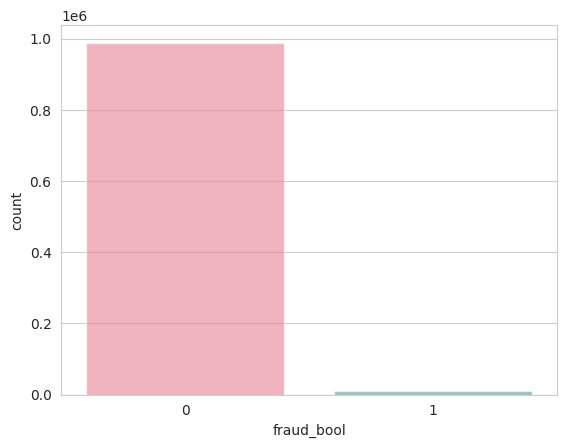

In [ ]:
# Plot the distribution of fraud_bool (fraud vs non-fraud)

ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)


<ipython-input-24-e1797e66a6cd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)


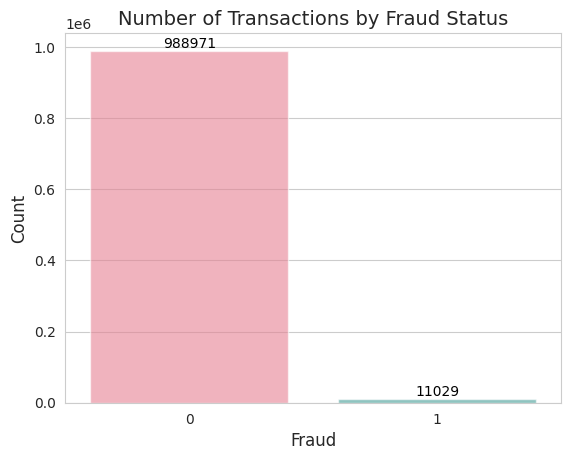

In [ ]:
# Set up the seaborn style and palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")


# Plot the distribution of fraud_bool (fraud vs non-fraud)
ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)

# Add labels for better readability
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize and display the plot
plt.title("Number of Transactions by Fraud Status", fontsize=14)
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## Analysis
The dataset is highly imbalanced, as shown in the chart, with **988971 legitimate transactions** compared to only **11029 fraudulent transactions**. This extreme imbalance means that the majority of the data consists of legitimate transactions, making it likely that a model trained on this dataset could simply predict most transactions as legitimate (non-fraudulent) without learning to identify fraudulent cases properly.

To ensure the model performs well in detecting fraudulent transactions, this imbalance needs to be addressed. Techniques such as **resampling (oversampling the minority class or undersampling the majority class)**, **using different evaluation metrics** (like **precision, recall, or F1-score**), or **applying algorithms specifically designed for imbalanced data** should be considered.


## 3. Data Preprocessing
To prepare the dataset for modeling, we need to:

- Separate features from the target variable (**fraud_bool**).
- Scale numerical features for better model performance.
- Handle categorical variables in the later steps using **SMOTENC**.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Dropping irrelevant columns (if any) and separating features from target
X = base.drop(columns=['fraud_bool'])
y = base['fraud_bool']

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Scaling numerical features
numerical_features = ['income', 'customer_age', 'days_since_request', 'intended_balcon_amount']
scaler = StandardScaler()

In [ ]:
# Apply the scaler to the numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print(X_train.head())


          income  name_email_similarity  prev_address_months_count  \
506532  1.161943               0.867135                         -1   
327991  1.161943               0.683567                         -1   
715937  1.161943               0.208940                         -1   
860726  0.472990               0.081863                         -1   
78617   0.472990               0.055971                         55   

        current_address_months_count  customer_age  days_since_request  \
506532                           163      1.356529           -0.185255   
327991                           358     -1.139019            1.624991   
715937                            80      0.524680            1.575037   
860726                           389     -0.307170            4.741603   
78617                             10      0.524680           -0.188198   

        intended_balcon_amount payment_type  zip_count_4w  velocity_6h  ...  \
506532               -0.447460           AB           7

## Analysis

The data is ready for model training, with numerical features already scaled. However, there is still a big imbalance between legitimate and fraudulent transactions, which needs to be fixed using techniques like **SMOTE** or **undersampling**. Categorical features also need to be encoded before training the model. Once these issues are addressed, the data will be fully prepared for fraud detection.


## 4. Handling Class Imbalance with SMOTENC
Since fraudulent transactions are rare, we will use SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous variables) to create synthetic examples of fraudulent transactions to balance the dataset.


In [ ]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

# Identify categorical features and their indices
categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTENC with categorical feature indices
smote_nc = SMOTENC(categorical_features=categorical_feature_indices, random_state=42)

# Apply SMOTENC to the training data
X_res, y_res = smote_nc.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Resampled dataset shape: {X_res.shape}")
print(f"Class distribution after resampling:\n{y_res.value_counts()}")


Resampled dataset shape: (1384370, 31)
Class distribution after resampling:
fraud_bool
0    692185
1    692185
Name: count, dtype: int64


#==>Analysis :
I successfully applied SMOTENC to balance my training dataset, resulting in an equal number of legitimate (`fraud_bool = 0`) and fraudulent (`fraud_bool = 1`) transactions, with 692 185 instances each. This effectively addresses the class imbalance that was present in the original data, which would have led to a model biased towards predicting only non-fraudulent transactions. Now, with a balanced dataset, my model will have a better chance to learn the patterns of fraudulent behavior, improving its ability to detect fraud, particularly in terms of recall and precision. This gives me a solid foundation to build a more accurate and fair fraud detection model.

# 5. Model Training and Evaluation with Baseline Models

With the dataset balanced using SMOTENC, I now move on to training my machine learning models. I begin by training **Random Forest (RF)** and **Extra Trees (ET)** classifiers. Afterward, I’ll evaluate them using classification metrics that are particularly important for imbalanced datasets like this one.

## Step 5.1: Model Hyperparameter Tuning

To improve the models' ability to detect fraudulent transactions, I perform hyperparameter tuning using **RandomizedSearchCV**, focusing on parameters that could help improve recall for the minority class (fraudulent transactions). For the **Random Forest**, I define a parameter grid and tune the model.


In [1]:
from sklearn.model_selection import RandomizedSearchCV



NameError: name 'rf_model' is not defined